# Aula 07 - Séries Temporais

# Fundamentos de Previsão

Material original: Prof. Dr. Eduardo Lobo Lustosa Cabral

Adaptação e atualização: Prof. Dr. Vitor Alex Oliveira Alves

### Importação das principais bibliotecas

In [1]:
import numpy as np                              
import pandas as pd                             
import matplotlib.pyplot as plt               
import tensorflow as tf
import os

%matplotlib inline

### Funções com métodos simples de previsão

In [2]:
# Modelo base
def BaseModel(series):
    N = len(series)
    y = series.copy()
    
    for t in range(1, N):
        y.iloc[t] = series.iloc[t-1]
    
    return y

# Modelo sazonal
def SazonalBaseModel(series, s):
    N = len(series)
    y = series.copy()
    
    for t in range(s, N):
        y.iloc[t] = series.iloc[t-s]
    
    return y

# Modelo de tendência
def trend_model(series,m):
    N = len(series)
    y = series.copy()
    
    for t in range(1, N):
        y.iloc[t] = series.iloc[t-1] + (series.iloc[t-1] - series.iloc[t-m])/(m-1)
    
    return y

### Cálculo do MAEP

In [3]:
# Função para calcular o erro médio absoluto porcentaul (MAEP)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / np.mean(y_true))) * 100

### Série de produção de cerveja

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


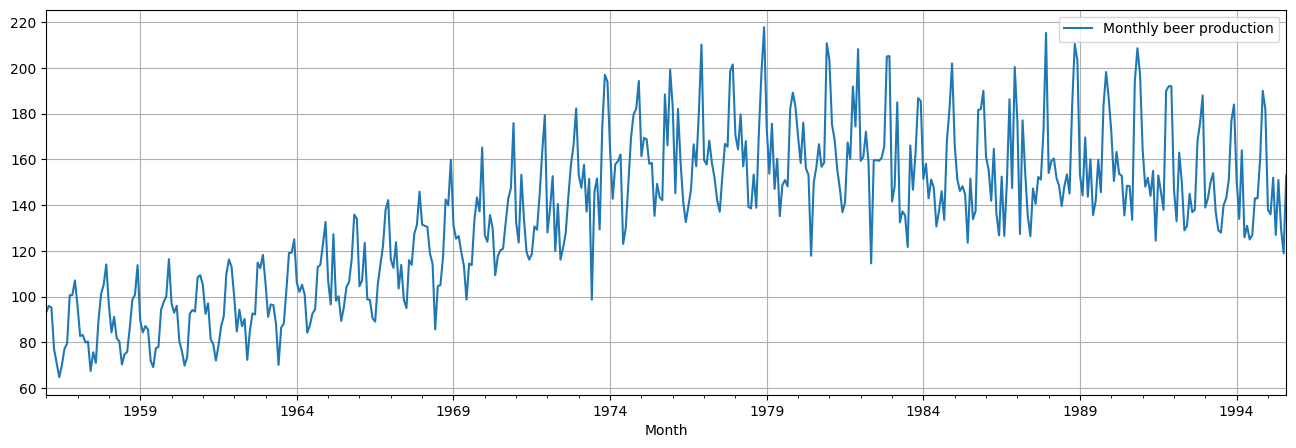

In [5]:
# Carrega conjunto de dados
df_beer = pd.read_csv('/content/drive/MyDrive/Datasets/monthly-beer-production-in-austr.csv')

# Separa coluna do mês
month = pd.to_datetime(df_beer.pop('Month'))

# Gráfico da série de dados
plot_cols = ['Monthly beer production']
plot_features = df_beer[plot_cols]
plot_features.index = month
_ = plot_features.plot(subplots=True, figsize=(16, 5))
plt.grid(True)

# Calcula a previsão de produção de cerveja usando modelo base 
y_base_beer = BaseModel(df_beer['Monthly beer production'])

# Calcula a previsão de produção de cerveja usando o modelo de tendências 
y_trend_beer = trend_model(df_beer['Monthly beer production'], 2)

# Calcula a previsão de produção de cerveja usando o modelo de sazonalidade 
y_sazonal_beer = SazonalBaseModel(df_beer['Monthly beer production'], 12)

### Série de temperaturas

13568290/13568290 [==============================] - 0s 0us/step


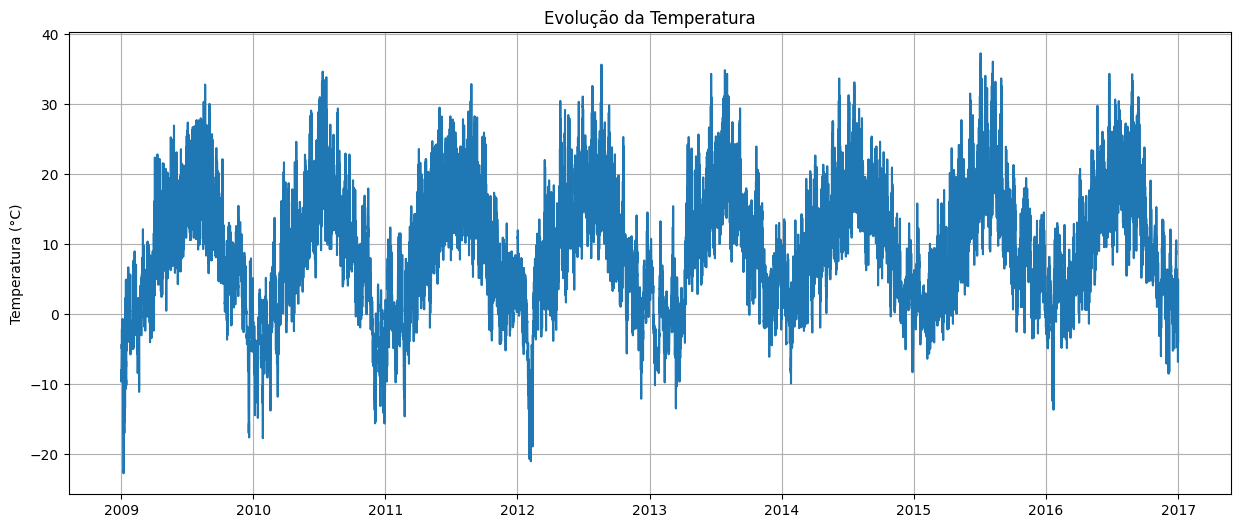

In [6]:
# Download do arquivo da série de temperaturas
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)

# Conversão dos dados para formato Pandas DataFrame
df_temp = pd.read_csv(csv_path)

# Decimação dos dados
df_temp = df_temp[5::6]

# Retirando a coluna data-hora
date_time = pd.to_datetime(df_temp.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

# Plotagem da série de temperaturas
plt.figure(figsize=(15, 6))
plt.title('Evolução da Temperatura')
plt.plot(date_time, df_temp['T (degC)'])
plt.ylabel('Temperatura (°C)')
plt.grid(True)
plt.show()

###  Série EUR USD Forex Pair Historical Data (2002 - 2020)

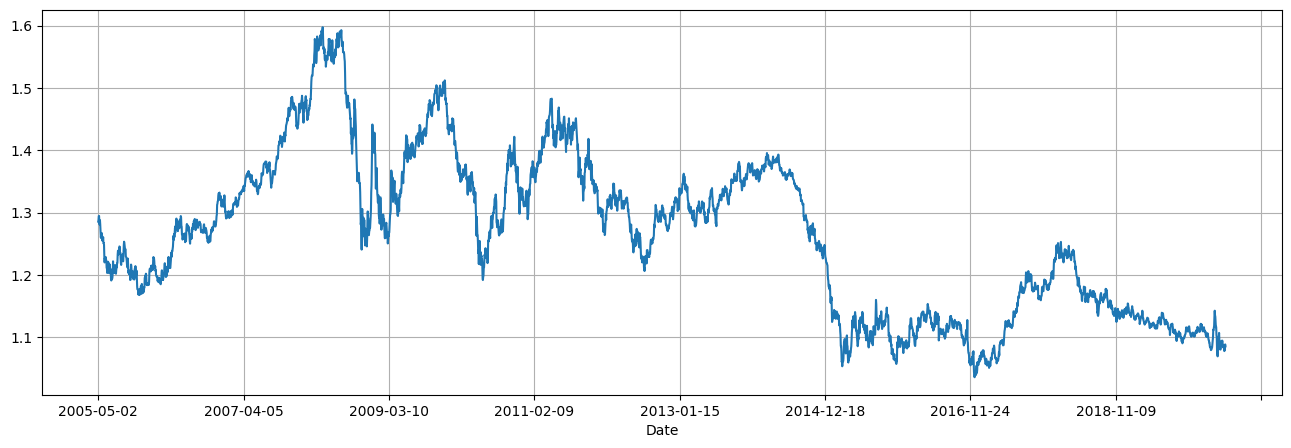

In [7]:
# Carregamento dos dados
df_forex = pd.read_csv('/content/drive/MyDrive/Datasets/eurusd_hour.csv')

# Selecionando somente as linhas com os dados de fechamento do dia
df_forex = df_forex[23::24]

# Separa coluna da data
date = df_forex.pop('Date')

# Separa coluna de taxa de fechamento
df_forex = df_forex.pop('BC')

# Plotagem da série forex
plot_features = df_forex
plot_features.index = date
_ = plot_features.plot(subplots=True, figsize = (16,5))
plt.grid(True)
plt.show()

## 7. Modelo de média móvel

O modelo de média móvel é uma extensão do método base. Trata-se de uma das técnicas mais usadas para séries temporais em razão da sua simplicidade aliada à sua capacidade de fornecer parâmetros importantes para análise de uma série temporal.
 
O modelo de média móvel assume que o valor futuro da variável depende da média de seus valores anteriores, segundo a equação:

$$\hat{y}_{t} = \frac{1}{m}\displaystyle\sum^{m}_{i=1} y_{t-i}$$
   
em que $m$ é o número de amostras anteriores consideradas no cálculo da média. O valor de $m$ deve ser escolhido em função do comportamento da série.

O código para implementar esse modelo é visto a seguir:

In [8]:
def moving_average(series, m):
  N = len(series)
  y = series.copy()
  for t in range(m, N):
    y.iloc[t] = np.average(series[t-m:t])
  return y

### Exemplo:

Vamos voltar à série de temperaturas. A previsão da temperatura na próxima hora será calculada usando o modelo de média móvel com quatro amostras passadas.

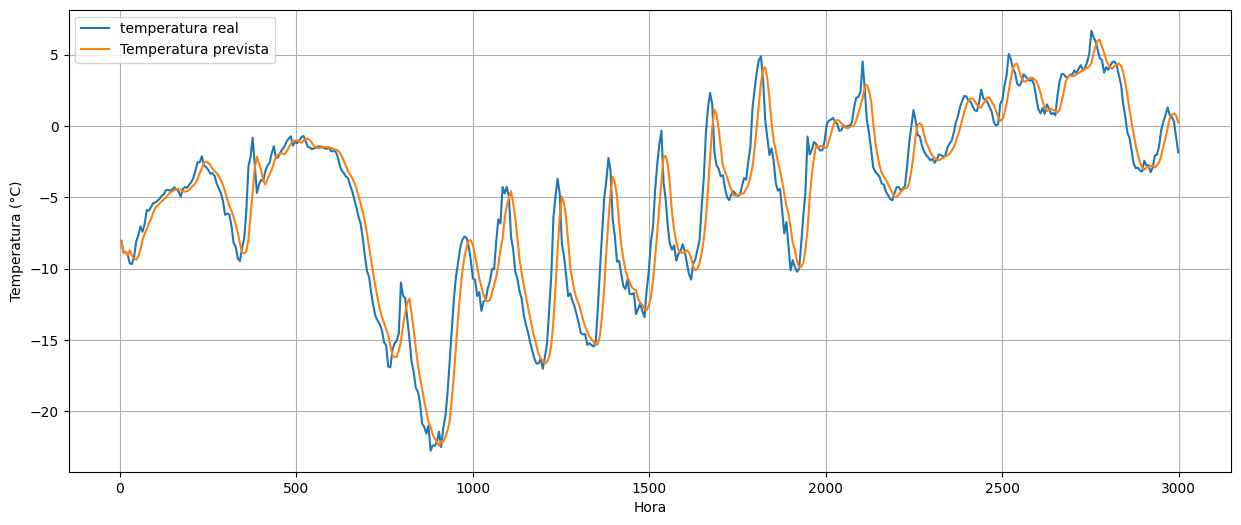

In [9]:
# Calcula a previsão para a próxima hora usando as últimas 4 horas
m = 4
y_prev = moving_average(df_temp['T (degC)'], m) 
# Visualização gráfica
plt.figure(figsize=(15, 6))
plt.plot(df_temp['T (degC)'].iloc[:500], label='temperatura real')
plt.plot(y_prev.iloc[:500], label='Temperatura prevista')
plt.ylabel('Temperatura (°C)')
plt.xlabel('Hora')
plt.grid(True)
plt.legend()
plt.show()

- Observe que as previsões consitem em valores filtrados da série, como vimos anteriormente no curso.

Erro de previsão de modelo calculado pelo MAEP:

In [10]:
from sklearn.metrics import mean_absolute_error

erro_movel = 100*mean_absolute_error(df_temp['T (degC)'], y_prev)/np.mean(df_temp['T (degC)'])
print(f'Erro média móvel = {np.array(erro_movel):.2f}%')

Erro média móvel = 15.91%


**IMPORATNTE:** O erro de previsão depende fortemente do tamanho $m$ adorado para a janela de média móvel $\to$ se mudarmos o tamanho da janela, o valor do erro é alterado.

Ressalta-se que esse modelo de média móvel somente prevê o próximo valor futuro e não é capaz de realizar previsões de longo prazo, uma vez que, para obter o valor no próximo instante de tempo são necessários que os dados anteriores estejam disponíveis.

Entretanto, o modelo de média móvel pode ser usado para outras finalidades. Como, por exemplo, suavizar a série original de forma a permitir indentificar tendências e *outliers*. 

Uma característica marcante da média móvel é o fato de quie, quanto maior for a ajanela adotada, mais suavizado fica o comportamento da série. No caso de dados afetados de muito ruído, o que ocoore com frequência, esse método pode auxiliar a identificar os padrãoes contidos nos dados.

### 7.1 Média móvel com Pandas

Existem ferramentas prontas para implementar a média móvel, como por exemplo a função [`rolling(window).mean()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html) da biblioteca Pandas.   

O código abaixo implementa o cálculo da média móvel usando essa função do Pandas. Nele, também são calculados os limites inferior e superior, definidos como sendo variações de múltiplos do desvio padrão do erro.

In [11]:
def plotMediaMovel(series, window, plot_intervals=False, scale=1.96):
    """
    series - conjunto de dados da série
    window - comprimento da janela deslizante (número de valores passados usados para calcular a média móvel) 
    plot_intervals - apresenta inervalos de confiança 
    scale - fator de multiplicação para calcular intervalo de confiança 
    """
    # Cálculo da média móvel
    media_movel = series.rolling(window=window, closed='left').mean()
    # Visualização gráfica
    plt.figure(figsize=(15, 6))
    plt.title(f'Média móvel \n (comprimento da janela = {window})')
    plt.plot(media_movel, 'g', label="Tendência da média móvel")

    # Cálculo do intervalo de confiança para a série suavizada (usando um desvio padrão)
    if plot_intervals:
        mae = mean_absolute_error(series[window:], media_movel[window:])
        desvio = np.std(series[window:] - media_movel[window:])
        limite_inferior = media_movel - (mae + scale * desvio)
        limite_superior = media_movel + (mae + scale * desvio)
        plt.plot(limite_superior, 'r--', label="Limite superior / Limite inferior")
        plt.plot(limite_inferior, 'r--')
        
    plt.plot(series[window:], label="Valores reais")
    plt.legend(loc="upper left")
    plt.grid(True)

A suavização da série de temperatura usando os últimos 4 dados para calcular a média móvel é realizado abaixo.

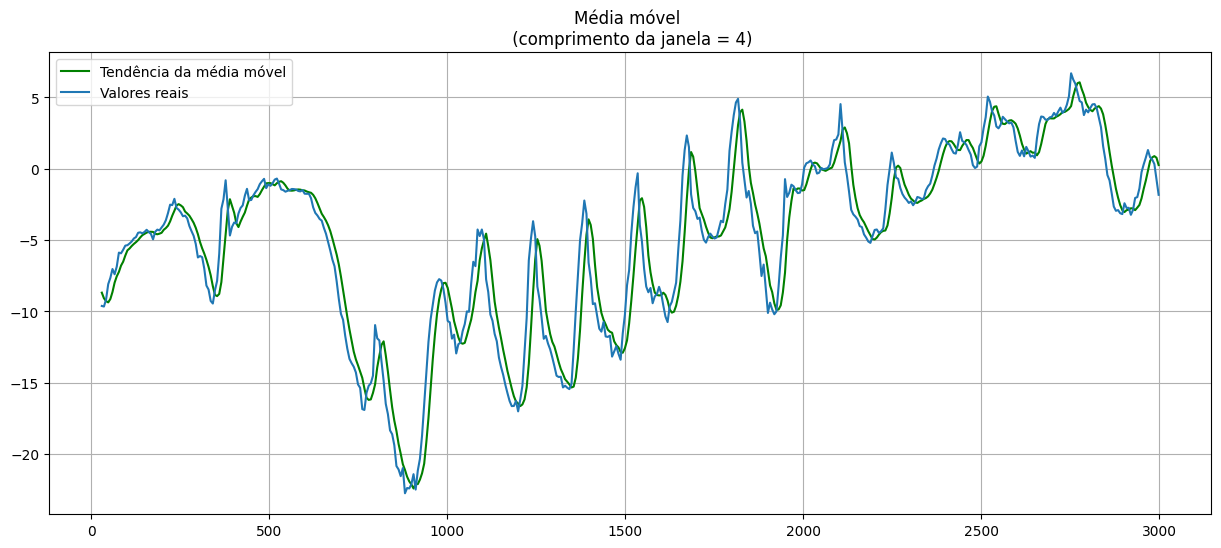

In [12]:
plotMediaMovel(df_temp['T (degC)'].iloc[:500], 4) 

A suavização da série de temperatura usando os últimos 12 dados para calcular a média móvel é calculada abaixo.

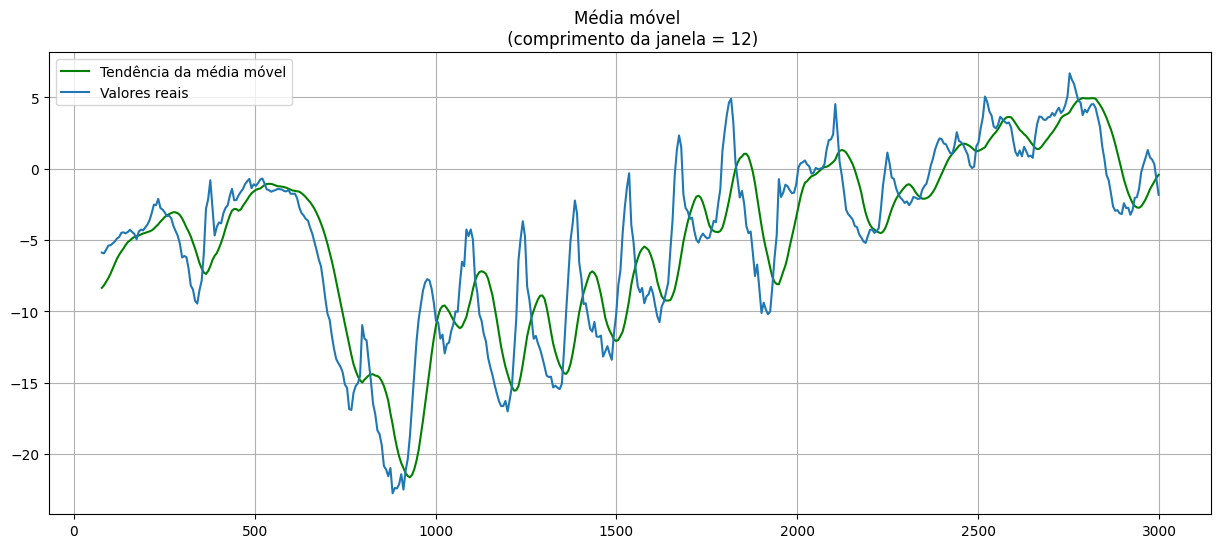

In [13]:
plotMediaMovel(df_temp['T (degC)'].iloc[:500], 12) 

Como os dados são coletados a cada hora, se forem utilizados os 24 dados anteriores para calcular a média móvel, obtém-se a tendência diária da série.

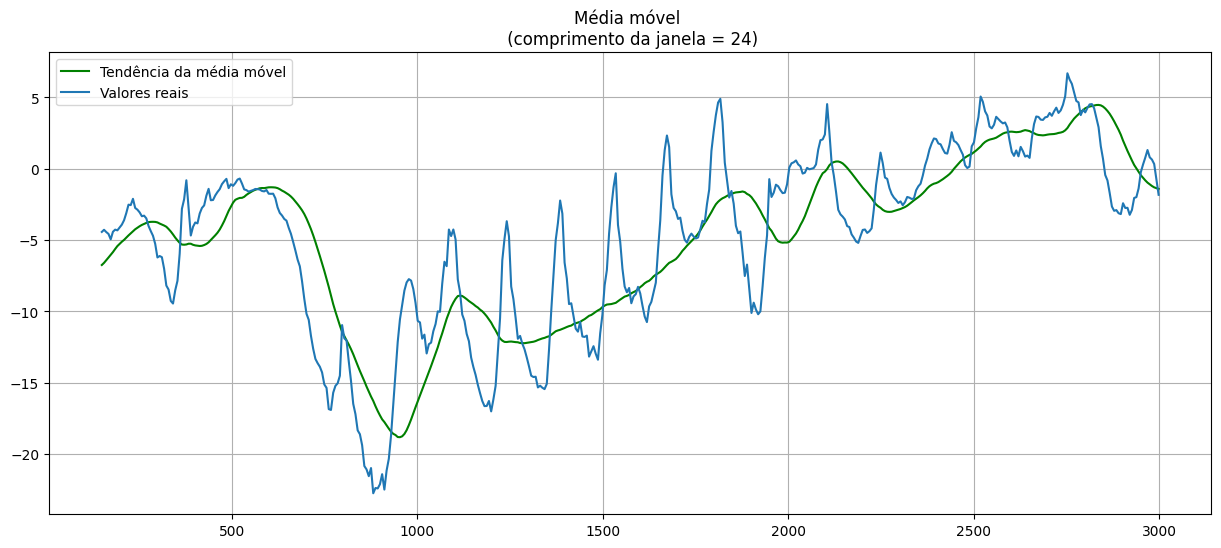

In [16]:
plotMediaMovel(df_temp['T (degC)'].iloc[:500], 24)

Quando se usa a suavização diária de dados coletados a cada hora, pode-se verificar mais facilm ente a dinâmica de variação da temperatura que, nesse período, tende a aumentar.

Pode-se também mostrar os intervalos de confiança dos dados. Bastando para isso chamar a função `plotMediaMovel` com essa opção.

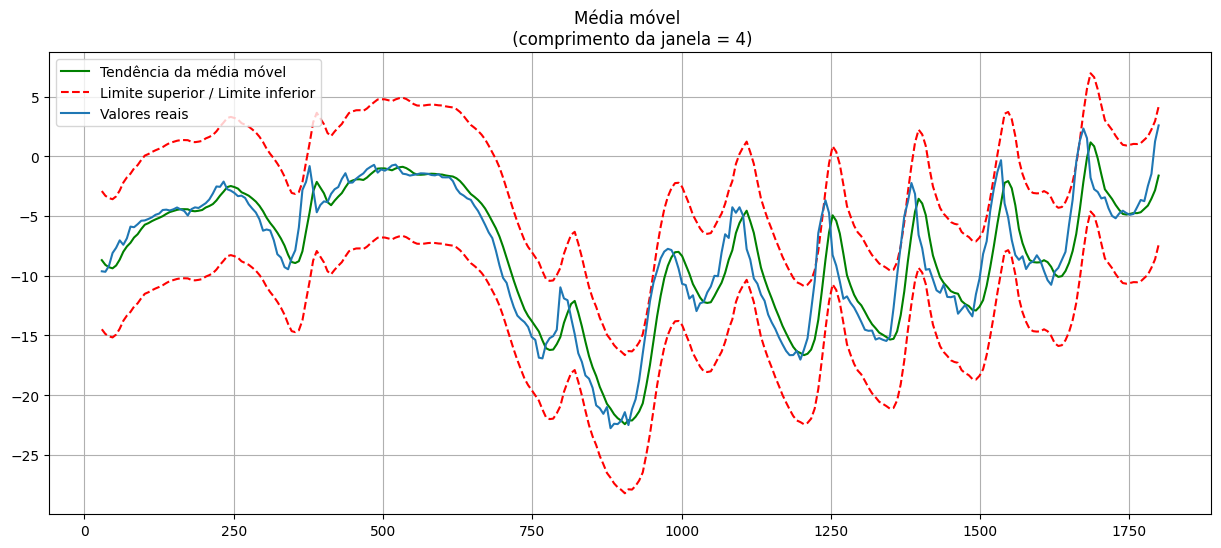

In [18]:
plotMediaMovel(df_temp['T (degC)'].iloc[:300], 4, plot_intervals=True)

## 8. Média móvel ponderada

A **média móvel ponderada** dos dados é uma modificação simples da média móvel. Nesse caso, os dados passados usados para calcular a média são ponderados com pesos diferentes. Em geral, pesos maiores são usados para dados mais recentes. Ressalta-se que a soma dos pesos deve ser sempre unitária, de forma a não alterar o valor médio dos dados.

A média móvel ponderada é definida por:

$$\hat{y}_{t} = \displaystyle\sum^{m}_{i=1} \omega_i y_{t-i}$$

em que $\omega_i$ é o peso do dado coletado no instante de tempo $t-iT_a$ e $m$ é o número de amostras passadas utilizadas no cálculo da média.

A função a seguir calcula a média móvel ponderada dos dados. 

In [19]:
def media_ponderada(series, weights):
    N = len(series)
    m = len(weights)
    y = series.copy()
    weights.reverse()
    for t in range(m, N):
        y.iloc[t] = 0.0
        for i in range(m):
            y.iloc[t] += series.iloc[t-i-1] * weights[i]
    return y

#### Série de temperatura

O cálculo da média móvel ponderada da série de temperatura é realizada abaixo. Observa-se que são utilizados os 4 últimos dados para calcular a média com pesos iguais a: 0.4, 0.3, 0.2 e 0.1.

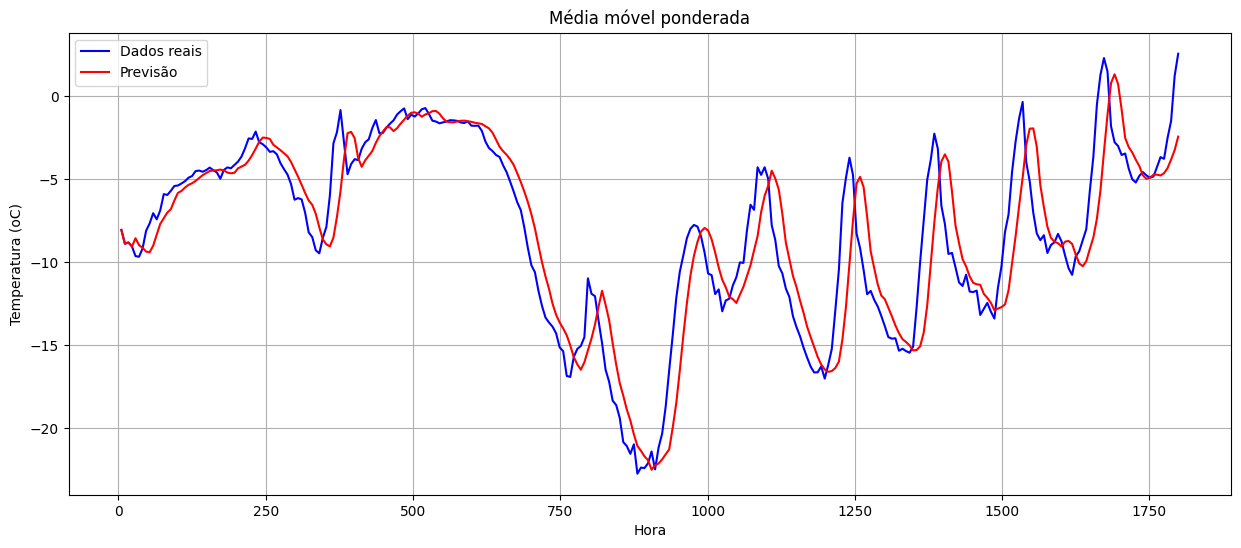

In [24]:
# Calcula a previsão para o último dia usando as últimas 24 horas
y_prev = media_ponderada(df_temp['T (degC)'].iloc[:300], [0.4, 0.3, 0.2, 0.1])
# Visualização gráfica
plt.figure(figsize=(15, 6))
plt.title('Média móvel ponderada')
plt.plot(df_temp['T (degC)'].iloc[:300], 'b', label='Dados reais')
plt.plot(y_prev, 'r', label='Previsão')
plt.ylabel('Temperatura (oC)')
plt.xlabel('Hora')
plt.legend()
plt.grid()
plt.show()

É possível também obter curvas suavizadas de séries usando a média móvel ponderada. Para isso, basta modificar a função `plotMediaMovel`, trocando a média móvel pela média móvel ponderada. Essa modificação é realizada no código abaixo.

In [31]:
# Função para calcular previsão da série usando a média móvel ponderada
def f(w):                        
    def g(x):
        n = len(w)
        return n*(w*x).mean()
    return g

# Função para calcular e fazer o gráfico da média móvel ponderada
def plotMediaMovelPonderada(series, window, weights, plot_intervals=False, scale=1.96):
    """
    series - conjunto de dados da série
    window - comprimento da janela deslizante (número de valores passados usados para calcula a média móvel) 
    weigths - pesos
    plot_intervals - apresenta inervalos de confiança 
    scale - fator de multiplicação para calcular intervalo de confiança 
    plot_anomalies - apresenta anomalias 
    """
    # Cálculo da média móvel ponderada (uso do método apply)
    media_movel = series.rolling(window=window, closed='left').apply(f(weights))
    # Visualização gráfica
    plt.figure(figsize=(15, 6))
    plt.title(f'Média móvel ponderada\n (comprimento da janela = {window})')
    plt.plot(media_movel, "g", label="Média móvel ponderada")

    # Cálculo do intervalo de confiança para a série suavizada (usando intervalo de um desvio padrão)
    if plot_intervals:
        mae = mean_absolute_error(series[window:], media_movel[window:])
        deviation = np.std(series[window:] - media_movel[window:])
        limite_superior = media_movel + (mae + scale * deviation)
        limite_inferior = media_movel - (mae + scale * deviation)
        plt.plot(limite_superior, "r--", label="Limite superior / Limite inferior")
        plt.plot(limite_inferior, "r--")
        
    plt.plot(series[window:], label="Valores reais")
    plt.legend(loc="upper left")
    plt.grid(True)

As médias móveis ponderadas das série temperatura são calculadas chamando a função `plotMediaMovelPonderada` com os pesos desejados, conforme mostrado a seguir.

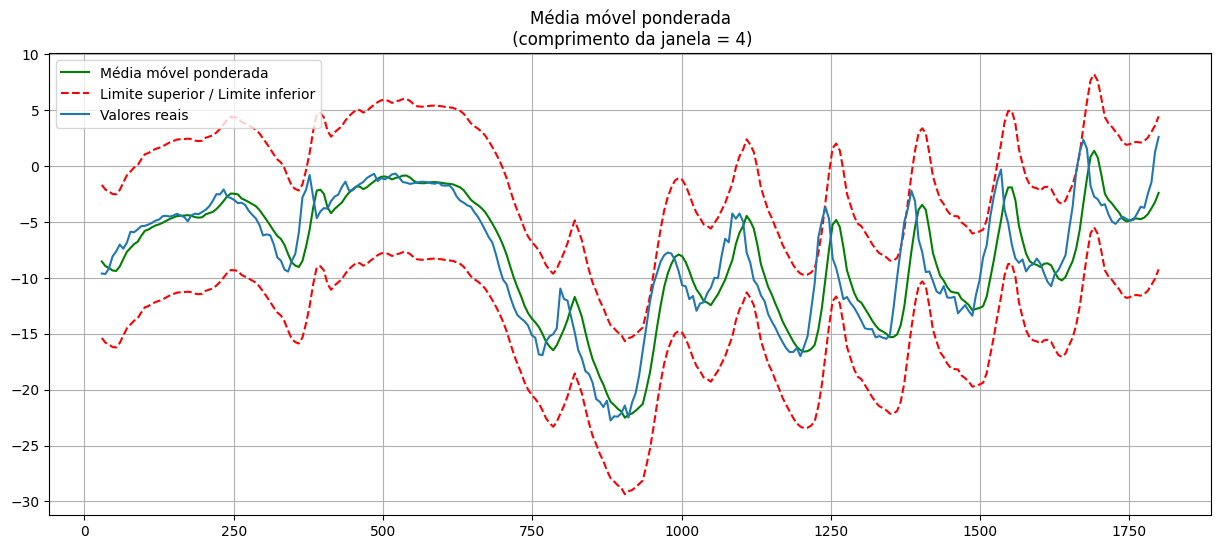

In [32]:
plotMediaMovelPonderada(df_temp['T (degC)'].iloc[:300], 4, weights=[0.4, 0.3, 0.2, 0.1], plot_intervals=True)

#### Série de câmbio FOREX

As médias móveis ponderadas das série de câmbio FOREX são calculadas chamando a função `plotMediaMovelPonderada` com um novo conjunto de pesos, conforme mostrado a seguir.

Pesos:
[0.50393701 0.2519685  0.12598425 0.06299213 0.03149606 0.01574803
 0.00787402]
Soma dos pesos = 1.0


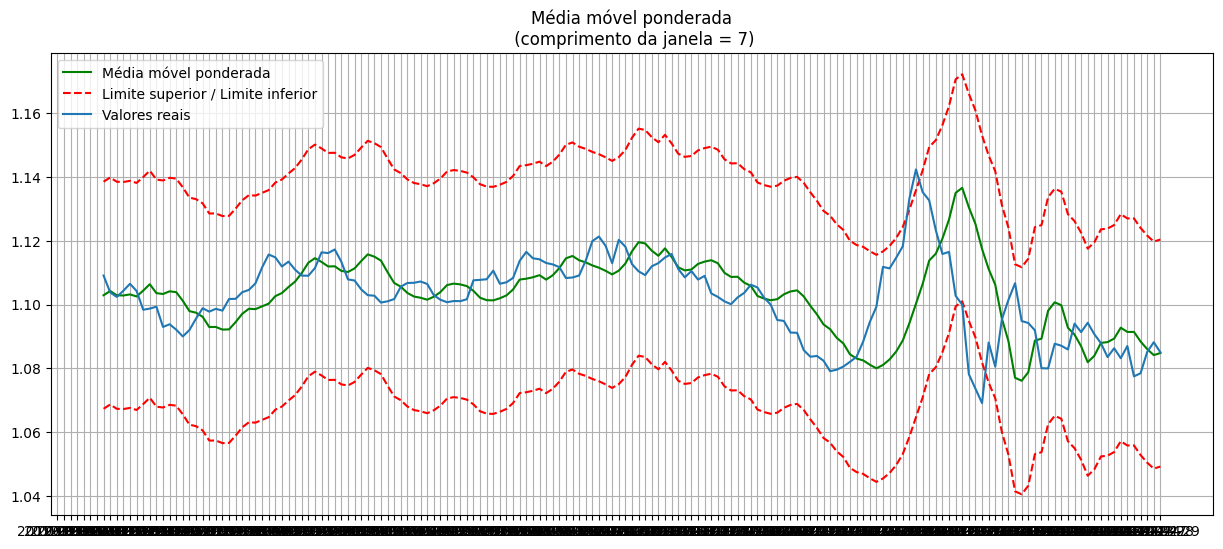

In [33]:
# Define pesos
weights = np.array([8., 4., 2., 1., 0.5, 0.25, 0.125])
weights = weights/np.sum(weights)
print(f'Pesos:\n{weights}')
print(f'Soma dos pesos = {np.sum(weights)}')

# Calcula média móvel ponderada
plotMediaMovelPonderada(df_forex.iloc[-168:], 7, weights=weights, plot_intervals=True)

## 9. Detecção de anomalias (*outliers*)

Usando esses métodos simples de previsão, incluindo os métodos de média móvel, é possível criar um sistema de detecção de anomalias na forma de variações bruscas nos dados (*outliers*). 

Para detectar *outliers* basta identificar os dados reais que ficam foram do intervalo de confiança das previsões.

Vamos alterar a função que calcula a média movel, usando o `Pandas`, para incluir detecção de anomalias da forma de *outliers*.

In [34]:
def plotMediaMovel(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):
    """
    series - conjunto de dados da série
    window - comprimento da janela deslizante (número de valores passados usados para calcular a média móvel) 
    plot_intervals - apresenta inervalos de confiança 
    scale - fator de multiplicação para calcular intervalo de confiança 
    plot_anomalies - apresenta anomalias 
    """
    # Cálculo da média móvel
    media_movel = series.rolling(window=window, closed='left').mean()
    # Visualização gráfica
    plt.figure(figsize=(15, 6))
    plt.title(f'Média móvel \n (comprimento da janela = {window})')
    plt.plot(media_movel, "g", label="Tendência da média móvel")

    # Calcula intervalo de confiança para a série suavizada usando um desvio padrão
    if plot_intervals:
        mae = mean_absolute_error(series[window:], media_movel[window:])
        desvio = np.std(series[window:] - media_movel[window:])
        limite_inferior = media_movel - (mae + scale * desvio)
        limite_superior = media_movel + (mae + scale * desvio)
        plt.plot(limite_superior, "r--", label="Limite superior / Limite inferior")
        plt.plot(limite_inferior, "r--")
        
        # Identifica anomalias, considerando que são valores que ultrapassam os níveis de confiança
        if plot_anomalies:
            anomalias = np.nan*series.copy()
            anomalias[series<limite_inferior] = series[series<limite_inferior]
            anomalias[series>limite_superior] = series[series>limite_superior]
            plt.plot(anomalias, "ro", markersize=10)
        
    plt.plot(series[window:], label="Valores reais")
    plt.legend(loc="upper left")
    plt.grid(True)

### 9.1 Série de temperatura

Vamos verificar se alguma anomalia é detectada na série de temperatura usando o método de previsão de média móvel. Para isso vamos chamar a função `plotMediaMovel`, com uma janela de 4 horas, com as opções de incluir os níveis superior e inferior de confiança e a detecção de anomalias. Lembre que esses dados são coletados a cada hora.

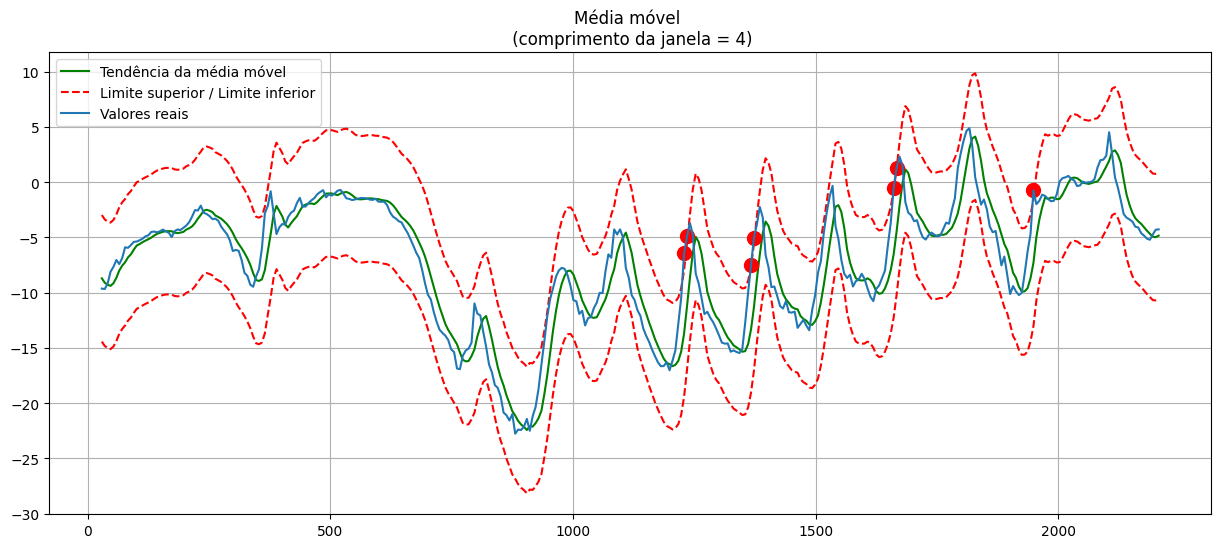

In [35]:
plotMediaMovel(df_temp['T (degC)'].iloc[:368], 4, plot_intervals=True, plot_anomalies=True)

- Observe que são detectadas algumas anomalias de temperatura nas horas do início da tarde onde geralmente ocorre um aumento maior de temperatura.

### 9.2 Série de câmbio FOREX

Agora vamos analisar a série de cambio FOREX. Para isso vamos novamente usar a função `plotMediaMovel` com as opções de incluir os níveis superior e inferior de confiança e a detecção de anomalias.

Nesse caso vamos calcular a média móvel para cada 12 horas. Lembre que esses dados são coletados a cada hora.

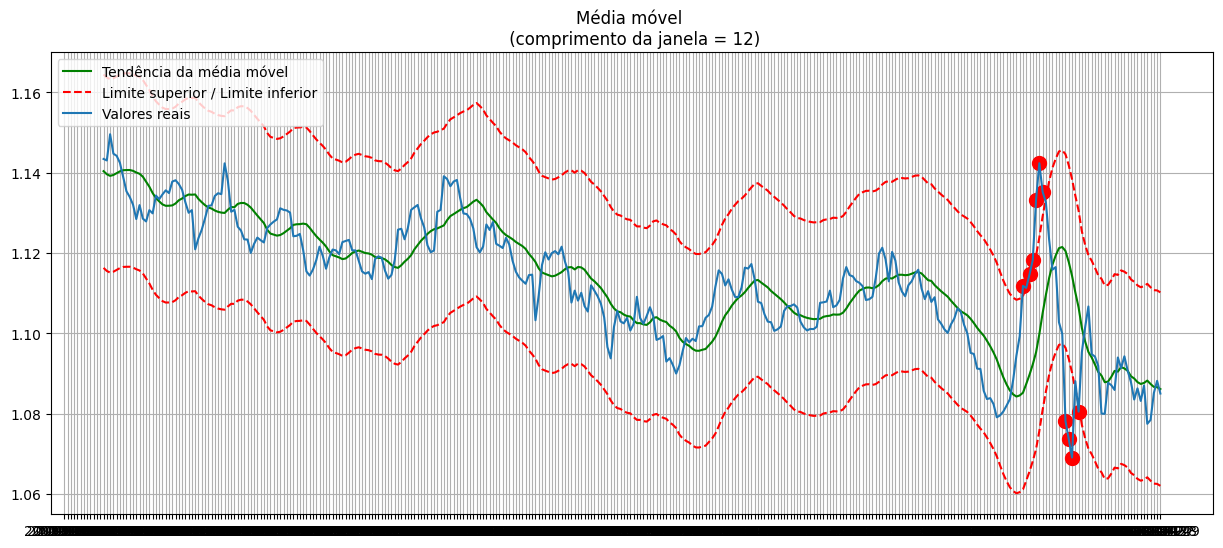

In [36]:
plotMediaMovel(df_forex.iloc[-336:], 12, plot_intervals=True, plot_anomalies=True) 

- Observa-se que foram detectadas algumas anomalias nos dados, quando a taxa de cambio apresentou grandes flutuações. 

**IMPORTANTE:** É comum confundir anomalias com variações sazonais ou ciclos $\to$ assim, quando se deseja detectar anomalias de forma eficiente (evitando falsos positivos) deve-se usar modelos mais complexos, capazes de capturar sazonalidades e ciclos.

## 10. Conclusão

Foram apresentados alguns métodos para transformar dados, avaliar qualidade de previsões e definir intervalo de confiança, além de modelos simples para realizar previsões. 

Existem dezenas de outros métodos mais modernos, tais como, mínimo quadrados, suavização exponencial, ARIMA, SARIMA e as redes neurais recorrentes que apresentam um desempenho muito bom.

Infelizmente, não existe uma forma muito eficiente de criar modelos para realizar previsões de séries temporais. Isso está parcialmente relacionado ao fato de que a tarefa de previsão é muito difícil pela própria natureza do mundo real. 

Apesar do grande número de métricas de avaliação de desempenho e métodos para estimativa de parâmetros, muitas vezes é necessário tentar algo diferente para cada série temporal. 